# Importando Nomes (API IBGE)

In [81]:
# API - Ranking de Nomes do IBGE
# https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking

In [82]:
# filtrando qtd de linhas = 20 e sexo feminino
# https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f

In [83]:
import pandas as pd

In [84]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [85]:
print("Quantidade de nomes: " + str(len(nomes_m) + len(nomes_f)))

Quantidade de nomes: 400


In [86]:
# Concatenando nomes masculinos e femininos

In [87]:
frames = [nomes_f, nomes_m]

In [88]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [89]:
# Concatenando apenas os nomes dentro de um DataFrame
nomes = pd.concat(frames)['nome'].to_frame()

In [90]:
#exibindo um amostra de 5 nomes
nomes.sample(5)

,nome
31,JOSEFA
172,WANDERSON
37,ROSANGELA
41,CLAUDIO
72,GILBERTO


# Incluindo ID dos alunos

In [91]:
import numpy as np
np.random.seed(123)

In [92]:
total_alunos = len(nomes)
total_alunos

400

In [93]:
# nova coluna com IDs aleatórios para os alunos
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [94]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [95]:
# atribuindo o dominio de e-mail para os alunos (2 dominios disponíveis)
dominios = ['@dominiodoemail.com.br', '@servicoemail.com']
nomes['dominio'] =  np.random.choice(dominios, total_alunos)   #escolhe entre os 2 dominios aleatóriamente

In [96]:
nomes.sample(5)

,nome,id_aluno,dominio
46,FABIANA,358,@servicoemail.com
38,DIEGO,294,@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br
119,MOISES,4,@servicoemail.com
101,GISELE,298,@servicoemail.com


In [97]:
# cria novo campo contendo o e-mail, todo em minúsculo
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [98]:
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,268,@servicoemail.com,marlene@servicoemail.com
76,TATIANE,203,@servicoemail.com,tatiane@servicoemail.com
65,MAURICIO,395,@servicoemail.com,mauricio@servicoemail.com
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br


# Criando Tabela de Cursos

In [99]:
#instalando bibliotecas necessárias

In [100]:
!pip install html5lib
!pip install lxml

In [101]:
import html5lib

In [102]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [103]:
type(cursos)

list

In [104]:
# convertendo para DataFrame
cursos = cursos[0]

In [105]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [106]:
# Alterando o titulo da coluna
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [107]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [108]:
# atribuindo ID para os cursos
cursos['id'] = cursos.index + 1

In [109]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [110]:
#utilizar o id como index

In [111]:
cursos.set_index('id')

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Atribuindo qtd de matriculas aos Alunos

In [112]:
#Atribução aleatória de valores
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [113]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicoemail.com,clara@servicoemail.com,3
64,ROBSON,290,@servicoemail.com,robson@servicoemail.com,2
13,DANIEL,195,@servicoemail.com,daniel@servicoemail.com,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [114]:
nomes['matriculas'].describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [115]:
# Avaliar as distribuições em um gráfico

In [116]:
import seaborn as sns

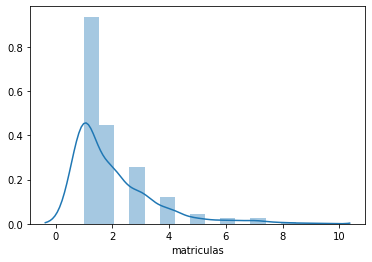

In [117]:
# Histograma usando o seaborn
sns.distplot(nomes.matriculas)

In [118]:
# Visualizando números
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

# Selecionando cursos

In [119]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,2
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,3
24,CLAUDIA,16,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,4
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,1


In [120]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [121]:
for index, row in nomes.iterrows():   # percorre linha a linha
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):       # para cada linha, atribui um curso aleatóriamente, de acordo com a qtd de matriculas
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)  # lança valores (relação) dentro da matriz
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])  # cria um DataFrame com o resultado obtido

In [122]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,43,17
2,43,6
3,304,17
4,156,16


In [123]:
# Verificar qtd de alunos por curso
matriculas.groupby('id_curso').count()

,id_aluno
id_curso,
0,3
1,8
2,22
3,22
4,19
5,65
6,62
7,47
8,48


In [124]:
# complementar com nome do curso (join)
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
0,3,Lógica de programação
1,8,Java para Web
2,22,C# para Web
3,22,Ruby on Rails
4,19,Cursos de Python
5,65,PHP com MySql
6,62,.NET para web
7,47,Novas integrações com Java
8,48,TDD com Java


In [125]:
# renomeia cluna de total
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,3,Lógica de programação
1,8,Java para Web
2,22,C# para Web
3,22,Ruby on Rails
4,19,Cursos de Python
5,65,PHP com MySql
6,62,.NET para web
7,47,Novas integrações com Java
8,48,TDD com Java


In [126]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

# Salvando dados em diferentes formatos

In [127]:
# Salva em CSV
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [128]:
# Converte para JSON
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"0":3,"1":8,"2":22,"3":22,"4":19,"5":65,"6":62,"7":47,"8":48,"9":22,"10":18,"11":46,"12":89,"13":78,"14":61,"15":65,"16":8,"17":88,"18":14,"19":22},"nome_do_curso":{"0":"L\\u00f3gica de programa\\u00e7\\u00e3o","1":"Java para Web","2":"C# para Web","3":"Ruby on Rails","4":"Cursos de Python","5":"PHP com MySql","6":".NET para web","7":"Novas integra\\u00e7\\u00f5es com Java","8":"TDD com Java","9":"C\\u00f3digo limpo com C#","10":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","11":"Hardware b\\u00e1sico","12":"Persist\\u00eancia com .NET","13":"Desenvolvendo jogos","14":"An\\u00e1lise de dados","15":"Estat\\u00edstica b\\u00e1sica","16":"Internet das coisas","17":"Programa\\u00e7\\u00e3o funcional","18":"Boas pr\\u00e1ticas em Java","19":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [129]:
# converte para html
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>1</th>
      <td>8</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>2</th>
      <td>22</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>22</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>4</th>
      <td>19</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>5</th>
      <td>65</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>6</th>
      <td>62</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>7</th>
      <td>47</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>8</th>
      <td>48</td>
  

# Criando banco SQL

In [130]:
!pip install sqlalchemy

In [131]:
from sqlalchemy import create_engine, MetaData, Table

In [132]:
engine = create_engine('sqlite:///:memory:')

In [133]:
# Enviando tabela para o banco de dados criado
matriculas_por_curso.to_sql('tbl_matriculas', engine)

In [134]:
# mostra tabelas existentes no banco de dados
print(engine.table_names())

['tbl_matriculas']


In [135]:
# Executando query no Banco de Dados
query = 'select * from tbl_matriculas where quantidade_de_alunos <20'
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,0,3,Lógica de programação
1,1,8,Java para Web
2,4,19,Cursos de Python
3,10,18,Preparatório para certificação Java
4,16,8,Internet das coisas
5,18,14,Boas práticas em Java


In [136]:
# lendo tabela completa
pd.read_sql_table('tbl_matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,3
1,Java para Web,8
2,C# para Web,22
3,Ruby on Rails,22
4,Cursos de Python,19
5,PHP com MySql,65
6,.NET para web,62
7,Novas integrações com Java,47
8,TDD com Java,48
9,Código limpo com C#,22


In [137]:
# realizando querys a partir de query já existentes
query_matriculas = pd.read_sql_table('tbl_matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [138]:
query_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,65
6,.NET para web,62
12,Persistência com .NET,89
13,Desenvolvendo jogos,78
14,Análise de dados,61
15,Estatística básica,65
17,Programação funcional,88


# Selecionando matriculas de determinado curso

In [139]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))


In [140]:
proxima_turma

,id_aluno,id_curso
4,156,16
28,185,16
165,203,16
273,72,16
444,309,16
560,207,16
657,374,16
792,215,16


In [141]:
#tabela Nomes

In [142]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicoemail.com,ana@servicoemail.com,2
2,FRANCISCA,304,@servicoemail.com,francisca@servicoemail.com,1
3,ANTONIA,156,@servicoemail.com,antonia@servicoemail.com,1
4,ADRIANA,343,@servicoemail.com,adriana@servicoemail.com,3
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicoemail.com,arlindo@servicoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicoemail.com,alvaro@servicoemail.com,3


In [143]:
# Fazer um "join" entre a tabela de nomes e a tabela de matriculas do curso 16
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
156,16,ANTONIA,@servicoemail.com,antonia@servicoemail.com,1
185,16,JESSICA,@dominiodoemail.com.br,jessica@dominiodoemail.com.br,7
203,16,TATIANE,@servicoemail.com,tatiane@servicoemail.com,5
72,16,GABRIELE,@servicoemail.com,gabriele@servicoemail.com,7
309,16,MATEUS,@dominiodoemail.com.br,mateus@dominiodoemail.com.br,1
207,16,DAVID,@servicoemail.com,david@servicoemail.com,3
374,16,JULIANO,@dominiodoemail.com.br,juliano@dominiodoemail.com.br,1
215,16,WESLEI,@servicoemail.com,weslei@servicoemail.com,1


In [144]:
# especificar colunas
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
156     ANTONIA
185     JESSICA
203     TATIANE
72     GABRIELE
309      MATEUS
207       DAVID
374     JULIANO
215      WESLEI
Name: nome, dtype: object

In [145]:
# transformar em DataFrame
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
156,ANTONIA
185,JESSICA
203,TATIANE
72,GABRIELE
309,MATEUS
207,DAVID
374,JULIANO
215,WESLEI


In [146]:
# retornando nome do curso
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Internet das coisas
id                                17
Name: 16, dtype: object

In [147]:
# trazendo apenas o nome
nome_curso = nome_curso.nome_do_curso
nome_curso

'Internet das coisas'

In [149]:
# atribuindo próxima turma a uma variável
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [151]:
proxima_turma

,nome
id_aluno,
156,ANTONIA
185,JESSICA
203,TATIANE
72,GABRIELE
309,MATEUS
207,DAVID
374,JULIANO
215,WESLEI


In [156]:
# renomeando coluna
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [157]:
proxima_turma

,Alunos do curso de Internet das coisas
id_aluno,
156,ANTONIA
185,JESSICA
203,TATIANE
72,GABRIELE
309,MATEUS
207,DAVID
374,JULIANO
215,WESLEI


In [158]:
# Exporta para Excel
proxima_turma.to_excel('Próxima Turma.xlsx', index = False)